In [4]:
# MINST Dataset
# https://deepai.org/dataset/mnist

import matplotlib.pyplot as plt
import numpy as np
from random import randint

▶ Processing header
#images		 60000
#rows		 28
#cols		 28
#pixels		 784 (28*28)
#labels		 60000
▶ Processing images
-----------------
Processing image with label 5


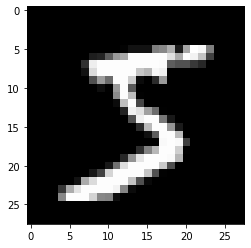

cost for this sample: 7404780255159.742
-----------------
Processing image with label 4


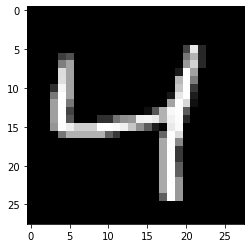

cost for this sample: 3889508990271.5454
-----------------
Processing image with label 2


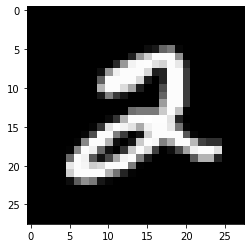

cost for this sample: 9033741655883.52
-----------------
Processing image with label 4


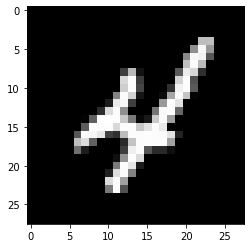

cost for this sample: 4986941430627.503
-----------------
Processing image with label 1


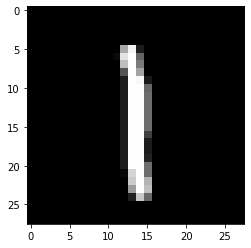

cost for this sample: 1322683111827.48
-----------------
Processing image with label 4


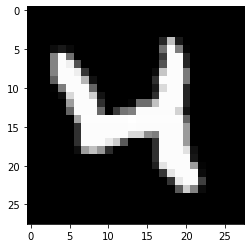

cost for this sample: 11772601091955.836
-----------------
Processing image with label 3


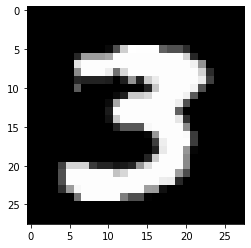

cost for this sample: 21097135944602.434
-----------------
Processing image with label 5


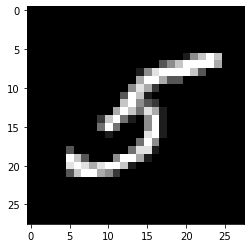

cost for this sample: 2789419726282.167
-----------------
Processing image with label 3


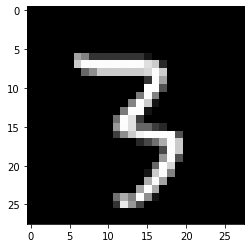

cost for this sample: 2814859528002.344
-----------------
Processing image with label 9


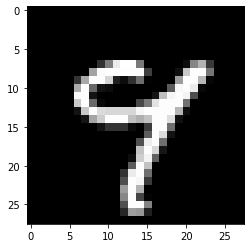

cost for this sample: 5481267865936.297
del Weights (avg): [array([], dtype=float64), array([[1.01744805e-312, 1.01744861e-312, 0.00000000e+000, ...,
        0.00000000e+000, 0.00000000e+000, 0.00000000e+000],
       [0.00000000e+000, 0.00000000e+000, 0.00000000e+000, ...,
        0.00000000e+000, 0.00000000e+000, 0.00000000e+000],
       [0.00000000e+000, 0.00000000e+000, 0.00000000e+000, ...,
        0.00000000e+000, 0.00000000e+000, 0.00000000e+000],
       ...,
       [0.00000000e+000, 0.00000000e+000, 0.00000000e+000, ...,
        0.00000000e+000, 0.00000000e+000, 0.00000000e+000],
       [0.00000000e+000, 0.00000000e+000, 0.00000000e+000, ...,
        0.00000000e+000, 0.00000000e+000, 0.00000000e+000],
       [0.00000000e+000, 0.00000000e+000, 0.00000000e+000, ...,
        0.00000000e+000, 0.00000000e+000, 0.00000000e+000]]), array([[1.01710785e-312, 1.01710785e-312, 1.01710785e-312,
        1.01710785e-312, 1.01710785e-312, 4.94065646e-324,
        0.00000000e+000, 4.94065646e-3

In [22]:
with open("mnist/train-images.idx3-ubyte", "r") as images,\
    open("mnist/train-labels.idx1-ubyte", "r") as labels:

    # --- Header (images)
    print('▶ Processing header')
    header_images = np.fromfile(images, dtype='>i', count=4) # big-endian integer (32-bit, 4 bytes)

    magic_number = header_images[0]
    img_count = header_images[1]
    row_count = header_images[2]
    col_count = header_images[3]
    pixel_count = row_count*col_count

    print(f"#images\t\t {img_count}")
    print(f"#rows\t\t {row_count}")
    print(f"#cols\t\t {col_count}")
    print(f"#pixels\t\t {pixel_count} ({row_count}*{col_count})")

    # --- Header (labels)
    header_labels = np.fromfile(labels, dtype='>i', count=2) # big-endian integer (32-bit, 4 bytes)
    magic_number = header_labels[0]
    label_count = header_labels[1]
    
    print(f"#labels\t\t {label_count}")


    # --- Show data samples (images & labels)
    # for i in range(1): # adjust to show more images
    #     i = randint(1, 100) # choose random image

    #     # Image
    #     img = np.fromfile(images, dtype=np.ubyte, count=28*28, offset=28*28*i)
    #     img = img.reshape((28, 28))
    #     imgplot = plt.imshow(img, cmap="gray")

    #     # Label
    #     label = np.fromfile(labels, dtype=np.ubyte, count=1, offset=i)[0]
    #     print(f"Label: {label}")

    #     plt.show()

    print('▶ Processing images')
    # --- Prepare for training & start

    batch_size = 10
    layers_count = 4
    # for i in range(60000/batch_size):
    for i in range(1): # process 3 batches
        delC_delWeights_avg = [np.empty(shape=weight_layers[l].shape) for l in range(layers_count)]
        delC_delBiases_avg = [np.empty(shape=bias_layers[l].shape) for l in range(layers_count)]


        # --- Process one batch
        for i in range(batch_size):
            print('-----------------')

            # Image
            img_784 = np.fromfile(images, dtype=np.ubyte, count=28*28, offset=28*28*i)
            img = img_784.reshape((28, 28))
            imgplot = plt.imshow(img, cmap="gray")

            # Label
            label = np.fromfile(labels, dtype=np.ubyte, count=1, offset=i)[0]
            print(f"Processing image with label {label}")

            plt.show()

            # --- Set input
            neuron_layers[0] = img_784

            # --- Feed through network
            # neurons = feed_forward(img_784)
            for l in range(1, layers_count):
                neuron_layers_z[l] = weight_layers[l] @ neuron_layers[l-1] + bias_layers[l]
                neuron_layers[l] = activation_function(neuron_layers_z[l])

            # --- Calculate costs
            label_one_hot = encode_one_hot(label, 10) # there are 10 labels (digits from 0 to 9)
            outputs = neuron_layers[layers_count-1]
            cost = calc_cost(outputs, label_one_hot)
            print(f"cost for this sample: {cost}")

            # --- Init gradient for weights and biases
            delC_delWeights = [np.empty(shape=weight_layers[l].shape) for l in range(layers_count)]
            delC_delBiases = [np.empty(shape=bias_layers[l].shape) for l in range(layers_count)]

            # --- Calculate gradient for all weights and biases
            for l in range(1, layers_count):
                neurons = neuron_layers[l]
                neurons_z = neuron_layers_z[l]
                weights = weight_layers[l]
                biases = bias_layers[l]

                for j, w_j in enumerate(weights):
                    # w_j comprises all weights for target j in layer l
                    #  b_j is the bias for target j in layer l
                    
                    del_act_function = derive_activation_function(neurons_z[j])

                    if (l == layers_count-1): # output layer
                        delC_delActivation = 2 * (neurons[j]-label_one_hot[j]) if l == layers_count-1 else None
                        bias = delC_delActivation * del_act_function
                        delC_delBiases[l][j] = bias

                    for k, w_jk in enumerate(w_j): # w_jk is an element of w_j
                        if (l != layers_count-1): # not output layer
                            delC_delActivation = np.sum(delC_delBiases[l+1] * weight_layers[l+1][:,j])
                            bias = delC_delActivation * del_act_function
                            delC_delBiases[l][j] = bias

                        activation_prev = neuron_layers[l-1][k]
                        delC_delWeights[l][j][k] = bias * activation_prev

            # --- Add to overall
            delC_delWeights_avg += delC_delWeights
            delC_delBiases_avg += delC_delBiases
        

        # --- Calculate average for this batch
        delC_delWeights_avg = [item / batch_size for item in delC_delWeights_avg]
        delC_delBiases_avg = [item / batch_size for item in delC_delBiases_avg]

        print(f"del Weights (avg): {delC_delWeights_avg}")
        print(f"del Biases (avg): {delC_delBiases_avg}")

        # --- Small steps to right direction
        # TODO
        



In [15]:
# --- Our model

# First layer:      784 neurons (pixels of our image with gray-scale values from 0..255)
# Hidden Layer 1:   16 neurons
# Hidden Layer 2:   16 neurons
# Output Layer:     10 layers (representing number 0..9)

# Layer1 ------------------- Layer2 ------------------- Layer3 ------------------- Layer4
# 784 (28*28)                  16                        16                   10 (digits 0-9)              <- #neurons
# input layer               hidden layer 1          hidden layer 2              output layer

#           784*16 weights                16*16 weights           16*10 weights                            <- #weights
#               16 biases                    16 biases               10 biases                             <- #biases
#          weights_2, biases_2         weights_3, biases_3      weights_4, biases_4


# --- Init neurons
neuron_layers_z = [np.empty(0), np.empty(16), np.empty(16), np.empty(10)]
neuron_layers = [np.empty(784), np.empty(16), np.empty(16), np.empty(10)]

# --- Init params (comprise weights and biases)
weight_layers = [np.empty(0), np.random.rand(16, 784), np.random.rand(16, 16), np.random.rand(10, 16)]
bias_layers = [np.empty(0), np.random.rand(16), np.random.rand(16), np.random.rand(10)]

In [ ]:
img_rand = np.random.randint(0,256, size=(784))
print(img_rand)

In [41]:
def feed_forward(img):
    """Feed through neural network. Returns the activation of the output layer (10-dim layer)"""
    neurons2 = activation_function(weights_2 @ img + biases_2) # neurons2: (16,1)
    neurons3 = activation_function(weights_3 @ neurons2 + biases_3) # neurons3: (16,1)
    neurons4 = activation_function(weights_4 @ neurons3 + biases_4) # neurons4: (10,1)
    return neurons4

# --- Test with random images
# img_rand = np.random.randint(0,256, size=(784))
# outputs = feed_forward(img_rand, label=8)
# print(outputs)

# --- Test witht the first two images
img1 = np.fromfile("mnist/train-images.idx3-ubyte", dtype=np.ubyte, count=28*28, offset=28*28*0)
img2 = np.fromfile("mnist/train-images.idx3-ubyte", dtype=np.ubyte, count=28*28, offset=28*28*1)
outputs1 = feed_forward(img1)
outputs2 = feed_forward(img2)
print(outputs1)
print(outputs2)
print('---------------- Difference:')
print(outputs2-outputs1)


[ 975222.86739996 1034613.24890504  715950.54060342  685489.25677853
  999302.50706467  621232.17157923  598823.76787091  811325.07771958
  752390.93751729  868785.56547644]
[1094115.55740054 1159893.27523458  802126.96299184  767651.79418427
 1119338.92254169  694758.76103982  671130.13638339  908876.98646284
  842428.43111998  972817.55285065]
---------------- Difference:
[118892.69000057 125280.02632954  86176.42238842  82162.53740574
 120036.41547702  73526.5894606   72306.36851248  97551.90874326
  90037.49360269 104031.98737421]


In [8]:
def train(img, label):
    # Start training
    outputs = feed_forward(img)
    label_one_hot = encode_one_hot(label, 10) # there are 10 labels (digits from 0 to 9)
    cost = calc_cost(outputs, label_one_hot)
    print(f"costs for this sample: {cost}")

In [13]:
def normalize(x):
    """Normalizes the array x"""
    return x / max(x)

def sigmoid(x):
    "Numerically stable sigmoid function."
    if x >= 0:
        z = np.exp(-x)
        return 1 / (1 + z)
    else:
        # if x is less than zero then z will be small, denom can't be
        # zero because it's 1+z.
        z = np.exp(x)
        return z / (1 + z)

def activation_function(x_vector):
    # sigmoid
    # return np.array([sigmoid(xi) for xi in x_vector])

    # relu
    relu = lambda x: max(0.0, x)
    return  np.array([relu(xi) for xi in x_vector])

def derive_activation_function(x):
    if x > 0:
        return 1
    else:
        return 0

In [14]:
def encode_one_hot(x, size):
    return np.eye(size)[x]

def calc_cost(outputs, desired):
    return np.sum((outputs-desired)**2)

In [786]:
cost = calc_cost(np.array([1,2,3,4,5]), np.array([2,2,3,4,7]))
print(cost)

5


In [803]:
one_hot_test = encode_one_hot(1, 10)
print(one_hot_test)

[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
